# Random Forest Classification

## Importing the libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

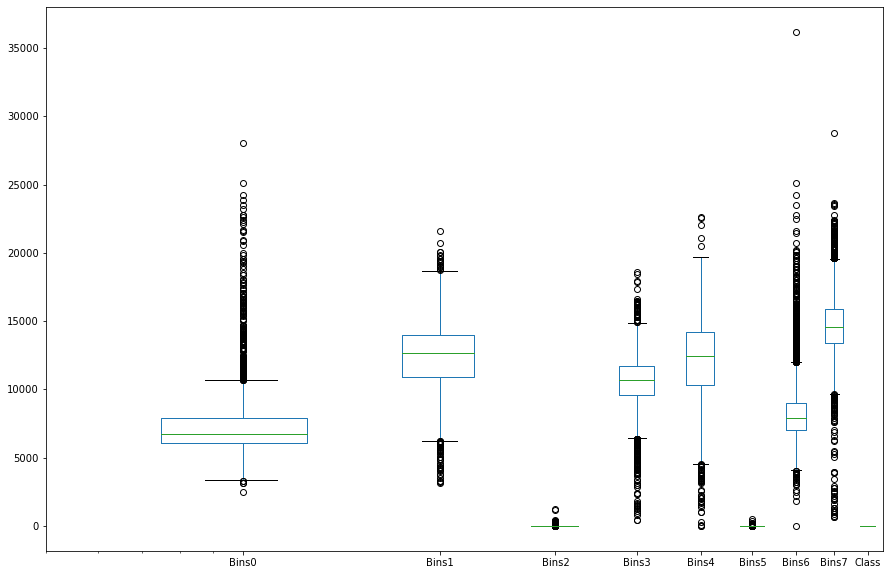

In [4]:
dataset = pd.read_csv('image_bins_lungs.csv')
dataset.plot(kind = 'box', figsize = (15, 10), logx=True)

In [5]:
#Dropping the outlier rows with standard deviation
factor = 3
upper_lim = dataset['Bins0'].mean () + dataset['Bins0'].std () * factor
lower_lim = dataset['Bins0'].mean () - dataset['Bins0'].std () * factor

dataset = dataset[(dataset['Bins0'] < upper_lim) & (dataset['Bins0'] > lower_lim)]

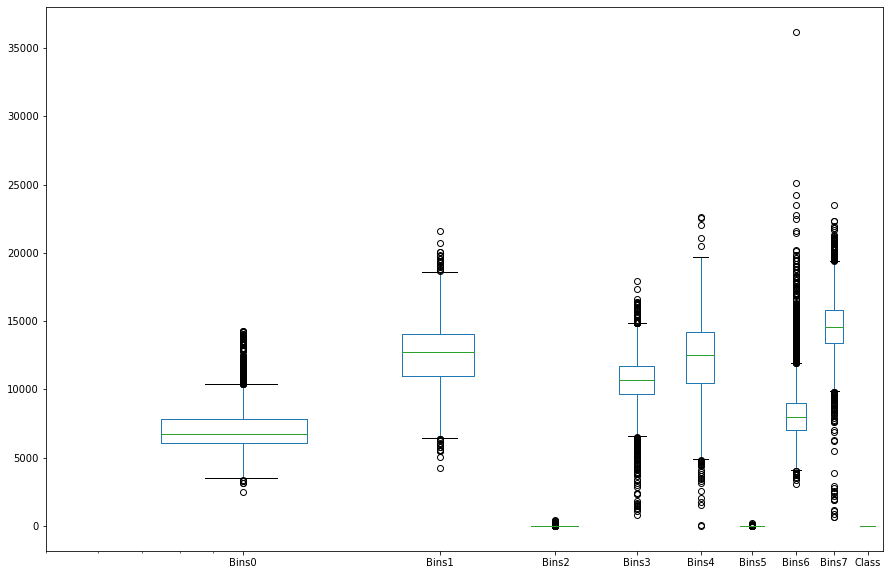

In [6]:
dataset.plot(kind = 'box', figsize = (15, 10), logx=True)

In [7]:
#Dropping the outlier rows with standard deviation
factor = 3
upper_lim = dataset['Bins6'].mean () + dataset['Bins6'].std () * factor
lower_lim = dataset['Bins6'].mean () - dataset['Bins6'].std () * factor

dataset = dataset[(dataset['Bins6'] < upper_lim) & (dataset['Bins6'] > lower_lim)]

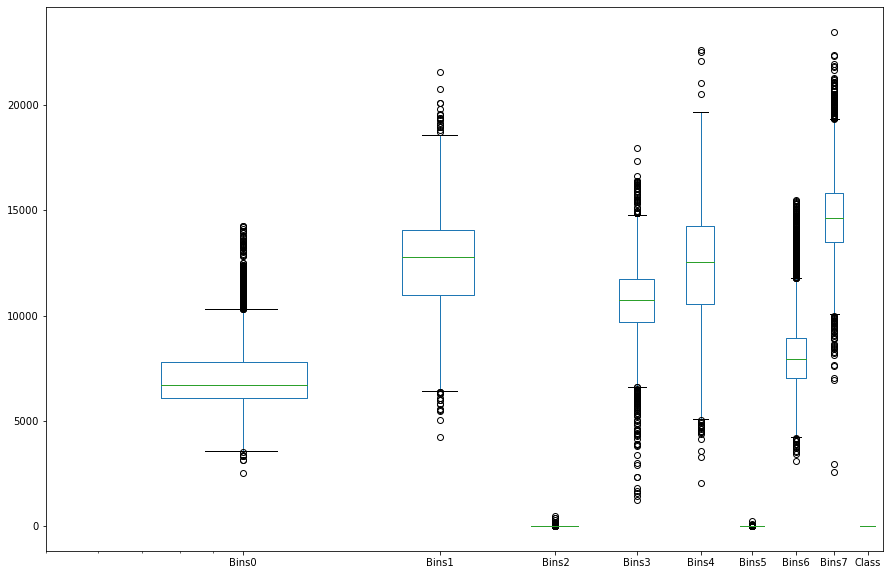

In [8]:
dataset.plot(kind = 'box', figsize = (15, 10), logx=True)

In [9]:
#Dropping the outlier rows with standard deviation
factor = 3
upper_lim = dataset['Bins3'].mean () + dataset['Bins3'].std () * factor
lower_lim = dataset['Bins3'].mean () - dataset['Bins3'].std () * factor

dataset = dataset[(dataset['Bins3'] < upper_lim) & (dataset['Bins3'] > lower_lim)]

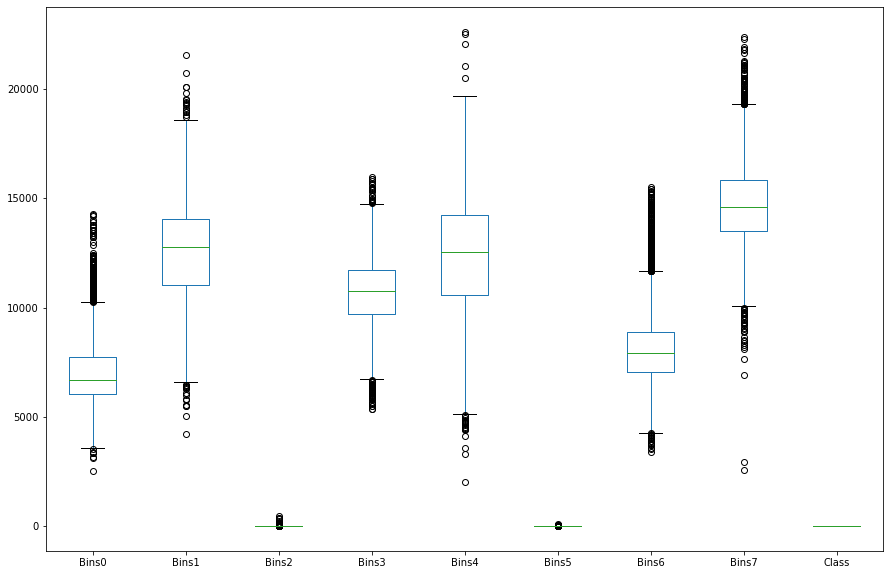

In [11]:
dataset.plot(kind = 'box', figsize = (15, 10))

In [12]:
X = dataset[['Bins0','Bins1','Bins2','Bins3','Bins4','Bins5','Bins6','Bins7']]
y = dataset.iloc[:, -1].values

In [13]:
print(X)

      Bins0  Bins1  Bins2  Bins3  Bins4  Bins5  Bins6  Bins7
0      4722  15567      4   7683  12061      1   8864  16634
1      6556  13701     25   9956   9437      0  12114  13747
2     10512  12249      1  11502   7743      2   9619  13908
3      7987  11854      2  10419  11895      9  11931  11439
4      7761  14159      4  10898  10560      9   9153  12992
...     ...    ...    ...    ...    ...    ...    ...    ...
3822   5983  15854     21   9752  12684      0   7985  13257
3823   4944  14257      4  11014  11561      0   9132  14624
3825   5946  14026      1  11041  12415      0   7886  14221
3826   7330   8408      6  10811  18521      2   6699  13759
3828   5415  17347      0   8790  12865      2   8924  12193

[3621 rows x 8 columns]


In [14]:
print(y)

[0 0 0 ... 2 2 2]


## Splitting the dataset into the Training set and Test set

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [16]:
print(X_train)

      Bins0  Bins1  Bins2  Bins3  Bins4  Bins5  Bins6  Bins7
1267   5617  14295      0   9908  11921      0   9648  14147
2432   6804  15276      0   9229  13408      0   7561  13258
1479   6505  11354      0   9233  17097      0   7204  14143
148    9021  10707      0   8866  11279      0  14082  11581
3700   5793  13275      1  11970  10981      0   7374  16142
...     ...    ...    ...    ...    ...    ...    ...    ...
907    6358  14192      2  10134   9971      0   7593  17286
3456   5050  10618      0  12784  14828      0   6655  15601
1798   6110  13654      0   9909  13561      0   7726  14576
2770   6283  16035      0   8507   9273      0  12421  13017
2902   5906  15338      1   8946  10857      0  12252  12236

[2715 rows x 8 columns]


In [17]:
print(y_train)

[1 1 1 ... 1 2 2]


In [18]:
print(X_test)

      Bins0  Bins1  Bins2  Bins3  Bins4  Bins5  Bins6  Bins7
244    8804  13229      0  12730   9327      0   9406  12040
2447   7622  14101      0  11374  11049      0   8259  13131
2578   6528  11532      5   8737  14704      0   6789  17241
1820   5597  10502      0  10547  14947      0   7445  16498
3232   7013  15062      0  10194  12365      0   9130  11772
...     ...    ...    ...    ...    ...    ...    ...    ...
3570   7842  13941      2  11797   9913      0   7372  14669
2648   9227  11659      1  13717   9755      0   6854  14323
3058   8435  13645      4  10200   9748      0   4858  18646
3502   7537  10170      0  10011  15743      0   7281  14794
3532   6499  14724      0   9932  12892      0   7772  13717

[906 rows x 8 columns]


In [19]:
print(y_test)

[0 1 2 1 2 2 2 1 2 2 0 1 0 0 0 1 2 0 2 2 0 0 2 2 1 1 0 2 1 1 0 0 1 2 2 0 0
 1 0 2 2 1 2 1 1 2 1 2 1 1 1 0 2 1 0 2 0 2 2 1 1 2 1 1 1 1 0 0 0 2 2 1 0 0
 2 0 0 1 0 1 0 0 1 2 0 1 1 0 0 2 1 1 0 2 2 2 1 2 0 0 1 1 2 2 2 0 1 1 1 2 1
 2 0 1 2 0 0 1 0 2 2 2 0 1 0 2 0 2 0 0 2 0 2 1 1 2 0 0 1 2 1 1 0 2 2 0 0 1
 0 1 1 2 2 1 0 2 1 2 0 2 2 2 1 1 2 2 1 1 1 0 0 1 1 0 1 2 0 1 0 2 2 1 0 2 2
 0 2 1 1 1 0 1 2 2 0 1 0 0 0 0 1 1 1 1 1 1 2 1 2 1 1 2 1 2 0 1 0 2 2 2 0 1
 1 0 2 1 2 0 1 1 1 2 0 2 2 1 0 2 2 1 2 0 1 1 2 2 1 2 2 1 0 2 1 2 1 1 2 0 0
 1 1 1 0 2 2 2 2 0 0 2 1 0 0 1 2 2 2 0 2 0 2 1 2 2 2 1 2 1 2 2 0 2 1 1 2 0
 2 0 1 0 2 0 2 0 0 2 2 1 2 0 2 0 1 2 1 0 1 0 1 2 0 0 0 0 1 0 1 0 0 0 2 1 2
 2 0 1 2 2 1 2 1 2 1 0 0 1 2 2 2 0 2 1 2 0 1 2 0 1 0 0 0 2 0 0 0 1 0 2 1 0
 2 2 2 2 2 0 1 1 2 2 2 2 2 2 2 0 2 2 2 0 0 1 1 1 0 2 2 0 0 2 0 1 0 2 1 0 0
 2 0 0 0 1 1 1 1 0 0 1 2 2 1 0 2 1 1 0 1 2 1 0 2 1 1 0 0 2 1 1 0 2 2 2 1 1
 1 2 1 1 1 2 1 0 2 1 1 1 2 1 0 1 0 0 0 1 0 2 1 2 2 2 2 2 1 1 0 0 0 1 1 2 1
 2 0 1 1 2 0 1 0 1 2 0 2 

## Feature Scaling

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
print(X_train)

[[-0.910967    0.7603851  -0.22958404 ... -0.18464241  0.82832642
  -0.29407214]
 [-0.15975498  1.19260385 -0.22958404 ... -0.18464241 -0.31377064
  -0.73259406]
 [-0.34898193 -0.53539    -0.22958404 ... -0.18464241 -0.50913655
  -0.29604524]
 ...
 [-0.59896403  0.47796693 -0.22958404 ... -0.18464241 -0.22347548
  -0.08245695]
 [-0.4894782   1.52701164 -0.22958404 ... -0.18464241  2.34583248
  -0.85147346]
 [-0.72806871  1.21992043 -0.17737963 ... -0.18464241  2.25334834
  -1.23672163]]


In [22]:
print(X_test)

[[ 1.10597716  0.29071619 -0.22958404 ... -0.18464241  0.69589351
  -1.33340363]
 [ 0.35792947  0.67491064 -0.22958404 ... -0.18464241  0.06820528
  -0.79524005]
 [-0.33442601 -0.45696498  0.03143802 ... -0.18464241 -0.73624258
   1.23212227]
 ...
 [ 0.87244958  0.47400162 -0.0207664  ... -0.18464241 -1.79296967
   1.92517435]
 [ 0.30413585 -1.05704852 -0.22958404 ... -0.18464241 -0.46699881
   0.02507711]
 [-0.35277913  0.94939819 -0.22958404 ... -0.18464241 -0.19830228
  -0.50618061]]


## Training the Random Forest Classification model on the Training set

In [23]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

## Making the Confusion Matrix

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[192  28  44]
 [ 25 253  47]
 [ 57  73 187]]


0.6975717439293598

In [25]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.73      0.71       264
           1       0.71      0.78      0.75       325
           2       0.67      0.59      0.63       317

    accuracy                           0.70       906
   macro avg       0.70      0.70      0.70       906
weighted avg       0.70      0.70      0.70       906



In [26]:
from sklearn import svm, metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
print(confusion_matrix(y_test, y_pred))

print('Accuracy: {0:.3f}'.format(metrics.accuracy_score(y_test, y_pred)))
print('F1 Score: {0:.3f}'.format(metrics.f1_score(y_test, y_pred)))
print('Sensitivity: {0:.3f}'.format(metrics.recall_score(y_test, y_pred)))
print('Precision: {0:.3f}'.format(metrics.precision_score(y_test, y_pred, pos_label='positive', average='micro')))
print('Recall: {0:.3f}'.format(metrics.recall_score(y_test, y_pred)))

[[192  28  44]
 [ 25 253  47]
 [ 57  73 187]]
Accuracy: 0.698


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

## Applying k-Fold Cross Validation

In [27]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 66.85 %
Standard Deviation: 3.63 %


In [ ]:
from tkinter import *
from tkinter import ttk
from tkinter import filedialog
import numpy as np
import cv2
 
def getbins(cell_image):
        a = np.array(cell_image[:,:,0], dtype = np.uint8)
        d = dict()
        for i in range (0,256):
            d[i]=0

        x = []
        for i in range (0,256):
            x.append(i)    

        y = []
        for i in range (0,256):
            y.append(d[i])
            
        num = 0
        den = 0
        for i in a.flatten():
            d[i] = d.get(i,0) + 1

        b = 0
        for i in x:
            b = d.get(i,0) + 1
            num = num + b*i
            den = den + b
        cogr = num / den
        
        a = np.array(cell_image[:,:,1], dtype = np.uint8)
        d = dict()
        for i in range (0,256):
            d[i]=0

        x = []
        for i in range (0,256):
            x.append(i)    

        y = []
        for i in range (0,256):
            y.append(d[i])

        num = 0
        den = 0
        for i in a.flatten():
            d[i] = d.get(i,0) + 1

        b = 0
        for i in x:
            b = d.get(i,0) + 1
            num = num + b*i
            den = den + b
            cogg = num / den
        
        a = np.array(cell_image[:,:,2], dtype = np.uint8)
        d = dict()
        for i in range (0,256):
            d[i]=0

        x = []
        for i in range (0,256):
            x.append(i)    

        y = []
        for i in range (0,256):
            y.append(d[i])

        num = 0
        den = 0
        for i in a.flatten():
            d[i] = d.get(i,0) + 1

        b = 0
        for i in x:
            b = d.get(i,0) + 1
            num = num + b*i
            den = den + b
        cogb = num / den
        
        h, w, _ = cell_image.shape
        R, G, B = 0, 1, 2

        for color, cog in [(R, cogr), (G, cogg), (B, cogb)]:
            for r in range(h):
                for c in range(w):
                    if cell_image[r, c, color] <= cog:
                        cell_image[r, c, color] = 0
                    else:
                        cell_image[r, c, color] = 1
        
        bins0 = 0
        bins1 = 0
        bins2 = 0
        bins3 = 0
        bins4 = 0
        bins5 = 0
        bins6 = 0
        bins7 = 0
        for i in range(h):
            for j in range(w):
                r= cell_image[i,j,0];
                g= cell_image[i,j,1];
                b= cell_image[i,j,2];
        
                if r==0 and g==0 and b==0:
                        bins0= bins0 + 1
                elif r==0 and g==0 and b==1:
                        bins1= bins1 + 1
                elif r==0 and g==1 and b==0:
                        bins2= bins2 + 1
                elif r==0 and g==1 and b==1:
                        bins3= bins3 + 1
                elif r==1 and g==0 and b==0:
                        bins4= bins4 + 1
                elif r==1 and g==0 and b==1:
                        bins5= bins5 + 1
                elif r==1 and g==1 and b==0:
                        bins6= bins6 + 1
                elif r==1 and g==1 and b==1:
                        bins7= bins7 + 1
                        
        l=[]
        l.extend([bins0, bins1, bins2, bins3, bins4, bins5, bins6, bins7])
        
        return l

class Root(Tk):
    def __init__(self):
        super(Root, self).__init__()
        self.title("Python Tkinter Dialog Widget")
        self.minsize(640, 400)
        self.labelFrame = ttk.LabelFrame(self, text = "Open File")
        self.labelFrame.grid(column = 0, row = 1, padx = 20, pady = 20)
        self.button()
        self.button1() 
 
    def button(self):
        self.button = ttk.Button(self.labelFrame, text = "Browse A File",command = self.fileDialog)
        self.button.grid(column = 1, row = 1)
  
    def fileDialog(self):
        self.filename = filedialog.askopenfilename(initialdir =  "/", title = "Select A File", filetype =
        (("png files","*.png"),("all files","*.*")) )
        self.label = ttk.Label(self.labelFrame, text = "")
        self.label.grid(column = 1, row = 2)
        self.label.configure(text = self.filename)
 
    def button1(self):
        self.button = ttk.Button(self.labelFrame, text = "submit", command = self.get_prediction)
        self.button.grid(column = 1, row = 20)
        
    
    def get_prediction(self):
        my_image = cv2.imread(self.filename)
#         dst = cv2.fastNlMeansDenoisingColored(my_image,None,10,10,7,29)
        h = getbins(my_image)
        y=classifier.predict([h])
        if y==0:
            self.label.configure(text="COVID")
        elif y==1:
            self.label.configure(text="Normal")
        else:
            self.label.configure(text="Pneumonia")
root = Root()
root.mainloop() 